# ***Generation of Maze Problem :***

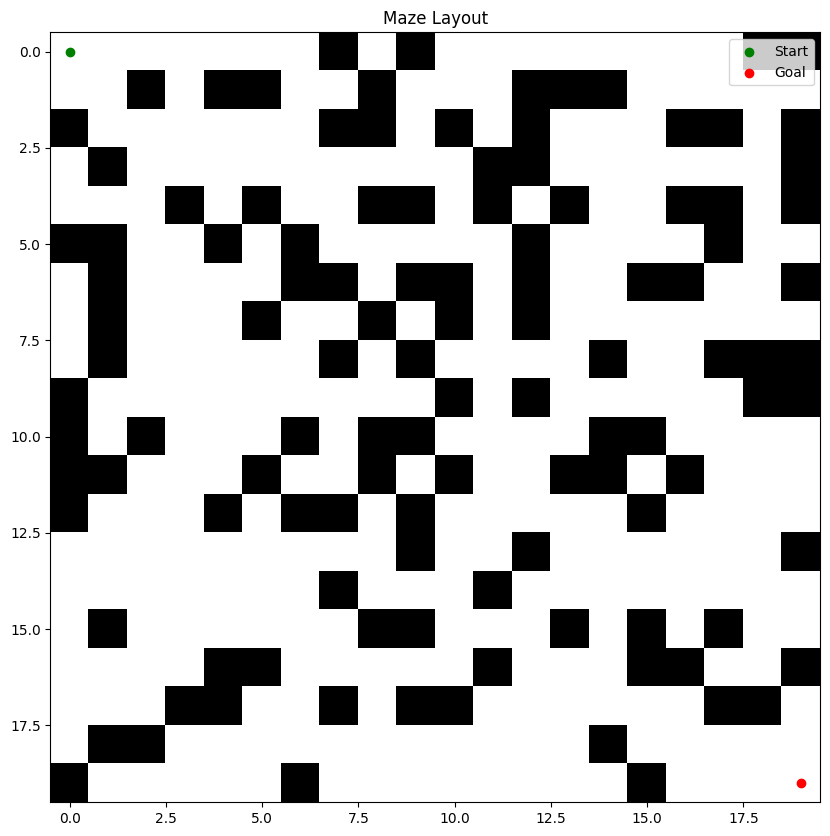

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to generate a maze of given size with strategically placed obstacles
def generate_maze(size, obstacle_chance):
    """
    Creates a maze with the specified size and obstacle density.
    :param size: Tuple representing the maze dimensions (rows, columns).
    :param obstacle_chance: Probability of placing an obstacle in each cell.
    :return: A 2D numpy array representing the maze.
    """
    maze = np.zeros(size, dtype=int)  # Initialize the maze with all cells open (value = 0)

    # Add obstacles to the maze
    for i in range(size[0]):  # Loop through rows
        for j in range(size[1]):  # Loop through columns
            if np.random.rand() < obstacle_chance:  # Place an obstacle based on probability
                maze[i, j] = 1  # Set cell value to 1 (obstacle)

    # Ensure the start and goal points are open
    maze[0, 0] = 0  # Start point
    maze[-1, -1] = 0  # Goal point
    return maze

# Function to display the maze with optional path and visited nodes
def plot_maze(maze, start, goal, path=None, visited_nodes=None):
    """
    Plots the maze using matplotlib.
    :param maze: The 2D numpy array representing the maze.
    :param start: Tuple indicating the start point (row, column).
    :param goal: Tuple indicating the goal point (row, column).
    :param path: Optional list of tuples representing the solution path.
    :param visited_nodes: Optional list of tuples representing visited nodes during search.
    """
    plt.figure(figsize=(10, 10))  # Set the figure size for better visualization
    plt.imshow(maze, cmap='Greys')  # Display the maze using a grayscale colormap

    # Mark the start point
    plt.scatter(start[1], start[0], c='green', label='Start')

    # Mark the goal point
    plt.scatter(goal[1], goal[0], c='red', label='Goal')

    # If a solution path exists, draw it on the maze
    if path:
        path_x = [p[1] for p in path]  # Extract x-coordinates from the path
        path_y = [p[0] for p in path]  # Extract y-coordinates from the path
        plt.plot(path_x, path_y, color='pink', linewidth=2, label='Path')  # Plot the path

    # If visited nodes are provided, mark them on the maze
    if visited_nodes:
        visited_x = [node[1] for node in visited_nodes]  # Extract x-coordinates of visited nodes
        visited_y = [node[0] for node in visited_nodes]  # Extract y-coordinates of visited nodes
        plt.scatter(visited_x, visited_y, c='orange', s=50, marker='x', label='Visited Nodes')  # Mark visited nodes

    plt.legend()  # Add a legend to explain markers
    plt.title("Maze Layout")  # Add a title to the plot
    plt.show()  # Display the plot

# Main execution
maze_size = (20, 20)  # Define the size of the maze (20x20 grid)
obstacle_chance = 0.3  # Define the probability of obstacles in the maze
start_point = (0, 0)  # Define the start point
goal_point = (19, 19)  # Define the goal point

# Generate the maze
maze = generate_maze(maze_size, obstacle_chance)

# Display the generated maze
plot_maze(maze, start_point, goal_point)


# ***BFS Algorithm :***

Search Results using BFS :
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 6), (2, 6), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 10), (5, 10), (5, 11), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (10, 17), (10, 18), (10, 19), (11, 19), (12, 19), (12, 18), (13, 18), (14, 18), (14, 17), (14, 16), (14, 15), (14, 14), (15, 14), (16, 14), (17, 14), (17, 15), (17, 16), (18, 16), (18, 17), (18, 18), (18, 19), (19, 19)]
Path found in 63 steps! 🎉
Number of visited nodes: 88
Execution Time: 0.0046045780181884766 seconds


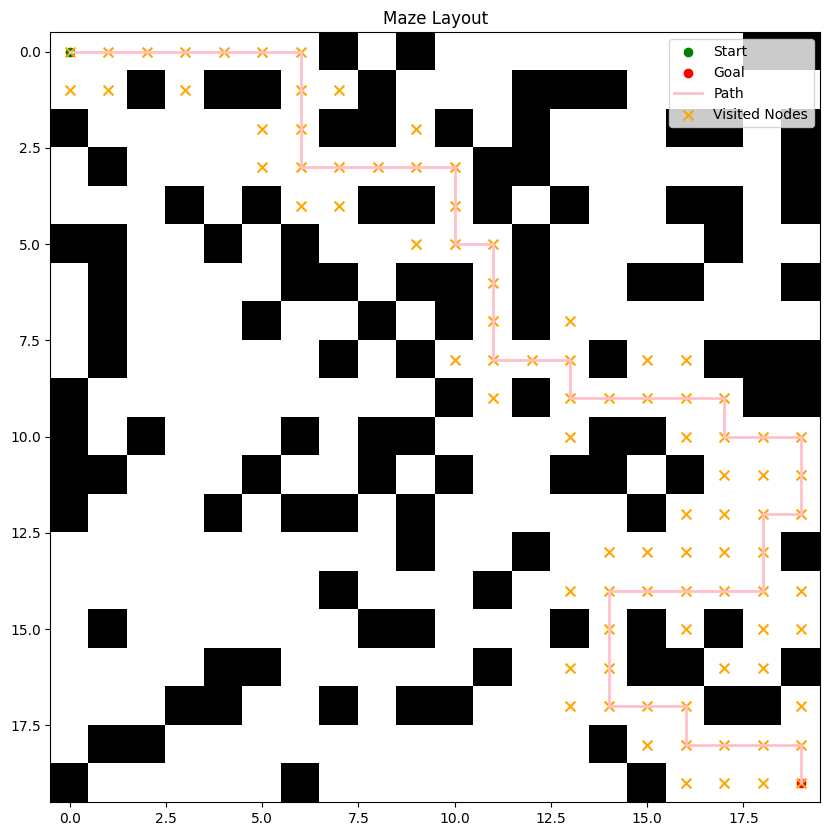

In [ ]:
import heapq


# Heuristic function (Manhattan Distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Best-First Search Algorithm:
def best_first_search(maze, start, goal):
    # open_list is a priority queue (implemented using heapq), which stores nodes (or positions) that the algorithm will explore,
    # prioritized by their heuristic values (in this case, their estimated distance to the goal).
    open_list = []
    heapq.heappush(open_list, (heuristic(start, goal), start))  # (priority, node)

    # To avoid revisiting nodes, we maintain a set of visited nodes.
    visited = set()
    visited.add(start)

    # Visited Nodes: This list tracks all visited nodes for visualization purposes.
    visited_nodes = [start]

    # Parent Map: This dictionary tracks the parent of each node so we can reconstruct the path once the goal is reached.
    parent_map = {start: None}

    # Steps Counter: Tracks the number of steps taken to find the goal or exhaust all possibilities.
    steps = 0

    # Condition will stop the loop once the open list is empty, meaning there are no more nodes left to explore.
    while open_list:
        # Increment the step counter
        steps += 1

        # heapq.heappop(open_list) is the operation that removes (or pops) the smallest item from the priority queue open_list.
        # In heapq, the smallest item is always at the front of the queue, and since we are using the heuristic as the priority,
        # this will be the node with the smallest heuristic value (i.e., the one that is closest to the goal).
        _, current = heapq.heappop(open_list)

        # Path Reconstruction: If the goal is reached, we backtrack from the goal to the start using the parent map and reverse the path before returning it.
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parent_map[current]
            print("Search Results using BFS :")
            print("Path:", path[::-1])
            print(f"Path found in {steps} steps! 🎉")
            print(f"Number of visited nodes: {len(visited_nodes)}")  # Print the number of visited nodes
            return path[::-1], visited_nodes, steps  # Return the path, visited nodes, and number of steps

        # Explore neighbors (up, down, left, right)
        neighbors = [(current[0]-1, current[1]), (current[0]+1, current[1]),
                     (current[0], current[1]-1), (current[0], current[1]+1)]
        # Loop through each neighbor
        for neighbor in neighbors:
            # Check if the neighbor is within the bounds of the maze
            if 0 <= neighbor[0] < maze.shape[0] and 0 <= neighbor[1] < maze.shape[1]:
                # Check if the neighbor is not a wall and hasn't been visited
                if maze[neighbor[0], neighbor[1]] == 0 and neighbor not in visited:
                    # Mark this neighbor as visited
                    visited.add(neighbor)
                    visited_nodes.append(neighbor)  # Add neighbor to visited nodes
                    # Record the current node as the parent of the neighbor
                    parent_map[neighbor] = current
                    # Add the neighbor to the open list with its heuristic value
                    heapq.heappush(open_list, (heuristic(neighbor, goal), neighbor))

    # If no path is found, return the visited nodes and print the number of steps taken.
    print(f"No path found after {steps} steps! ❌")
    print("Path: None")
    return None, visited_nodes, steps  # No path found

# Solve the maze using Best-First Search
start_time = time.time()  # Start timer
path, visited_nodes, steps = best_first_search(maze, start_point, goal_point)
end_time = time.time()    # End timer
execution_time = end_time - start_time

# Display the maze with the path if found, along with visited nodes
if path:
    print(f"Execution Time: {execution_time} seconds")
    plot_maze(maze, start_point, goal_point, path=path, visited_nodes=visited_nodes)

else:
    plot_maze(maze, start_point, goal_point, visited_nodes=visited_nodes)
    print(f"Execution Time: {execution_time} seconds")



# ***Alpha_Beta Algorithm :***


Search Results using Alpha-Beta Pruning:
Path found in 61 steps 🥳 
The Path is : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 6), (2, 6), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 10), (5, 10), (5, 11), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (10, 17), (10, 18), (10, 19), (11, 19), (12, 19), (12, 18), (13, 18), (14, 18), (14, 17), (14, 16), (14, 15), (14, 14), (15, 14), (16, 14), (17, 14), (17, 15), (17, 16), (18, 16), (18, 17), (18, 18), (18, 19), (19, 19)]
Number of visited nodes: 61
Execution Time: 0.0006911754608154297 seconds


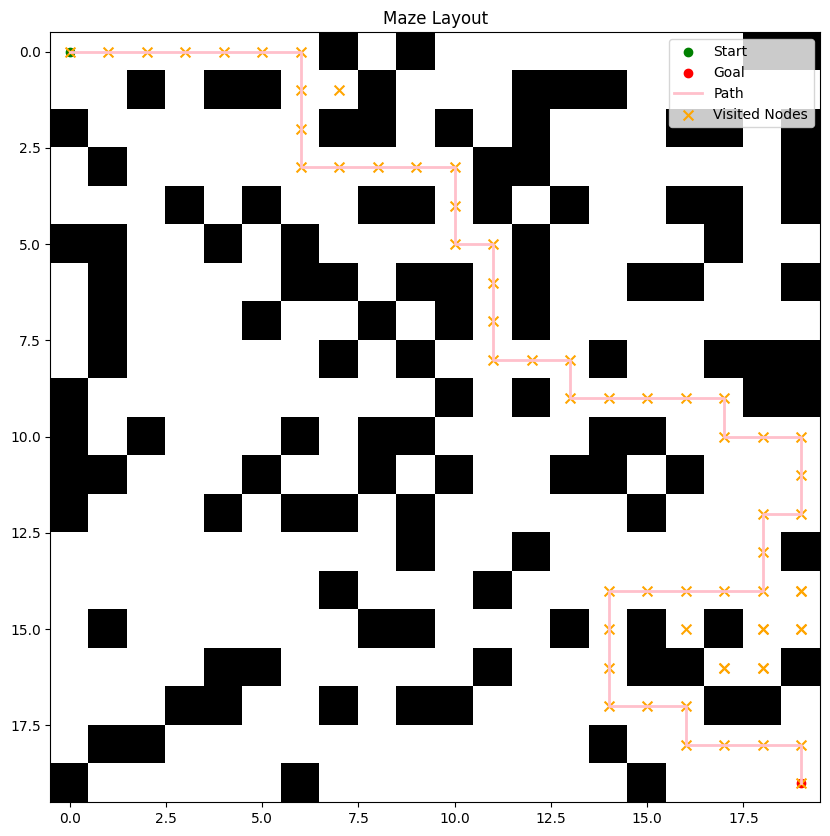

In [ ]:


def alpha_beta_search(maze, start, goal):
    """
    Performs alpha-beta pruning search to find a path from start to goal in the maze.
    """
    rows, cols = maze.shape  # Get the dimensions of the maze (number of rows and columns)
    path = []  # Initialize an empty list to store the path from start to goal
    steps = 0  # Counter to track the number of steps taken
    visited_nodes = []  # List to keep track of all visited nodes during the search

    # Helper function to check if a cell is valid for movement
    def is_valid(row, col):
        # A cell is valid if it is within the maze boundaries and not a wall (value = 0)
        return 0 <= row < rows and 0 <= col < cols and maze[row, col] == 0

    # Recursive function to perform alpha-beta pruning search
    def recursive_search(row, col, alpha, beta, current_path):
        nonlocal steps, path  # Access the steps and path variables defined outside this function
        steps += 1  # Increment the step counter as this node is being visited
        visited_nodes.append((row, col))  # Add the current node to the list of visited nodes
        current_path.append((row, col))  # Add the current node to the current path being explored

        # Base case: If the current node is the goal, save the path and return success
        if (row, col) == goal:
            path = current_path[:]  # Copy the current path as the found path
            return 1  # Return 1 to indicate the goal was found

        # Define possible moves: Right, Down, Left, Up
        possible_moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        # Explore each possible move
        for dr, dc in possible_moves:
            new_row, new_col = row + dr, col + dc  # Calculate the new position
            # Check if the new position is valid and not already in the current path
            if is_valid(new_row, new_col) and (new_row, new_col) not in current_path:
                # Recursively explore the new position
                value = recursive_search(new_row, new_col, alpha, beta, current_path)

                if value == 1:  # If the goal was found in this branch, return success
                    return 1

                if value == 0:  # If no solution was found in this path
                    alpha = max(alpha, 0)  # Update alpha for the maximizing player
                else:  # If a minimizing player's condition was encountered
                    beta = min(beta, 0)  # Update beta for the minimizing player
                    if alpha >= beta:  # If alpha is greater than or equal to beta, prune this branch
                        break

        current_path.pop()  # Backtrack: Remove the current node from the path
        return 0  # Return 0 to indicate no solution found in this branch

    # Start the recursive search from the start position with initial alpha and beta values
    start_time = time.time()  # Start timer
    recursive_search(start[0], start[1], -float('inf'), float('inf'), [])
    end_time = time.time()  # End timer
    execution_time = end_time - start_time  # Calculate execution time

    # Return the found path, list of visited nodes, and the number of steps taken
    return path, visited_nodes, steps, execution_time

# Execute Alpha-Beta Pruning search
path, visited_nodes, steps, execution_time = alpha_beta_search(maze, start_point, goal_point)

# Display search results
print("\nSearch Results using Alpha-Beta Pruning:")
if path:
    print(f"Path found in {steps} steps 🥳 ")  # Print success message and number of steps
    print("The Path is :", path)  # Print the path found from start to goal
    print(f"Number of visited nodes: {len(visited_nodes)}")  # Print the number of visited nodes
    print(f"Execution Time: {execution_time} seconds")  # Print the execution time
else:
    print("The Path is not Found 👹 ")  # Print failure message if no path was found

# Display the maze with the path and visited nodes
plot_maze(maze, start_point, goal_point, path=path, visited_nodes=visited_nodes)


# ***Hill climbing Algorithm :***

No valid moves, stuck in local minimum!


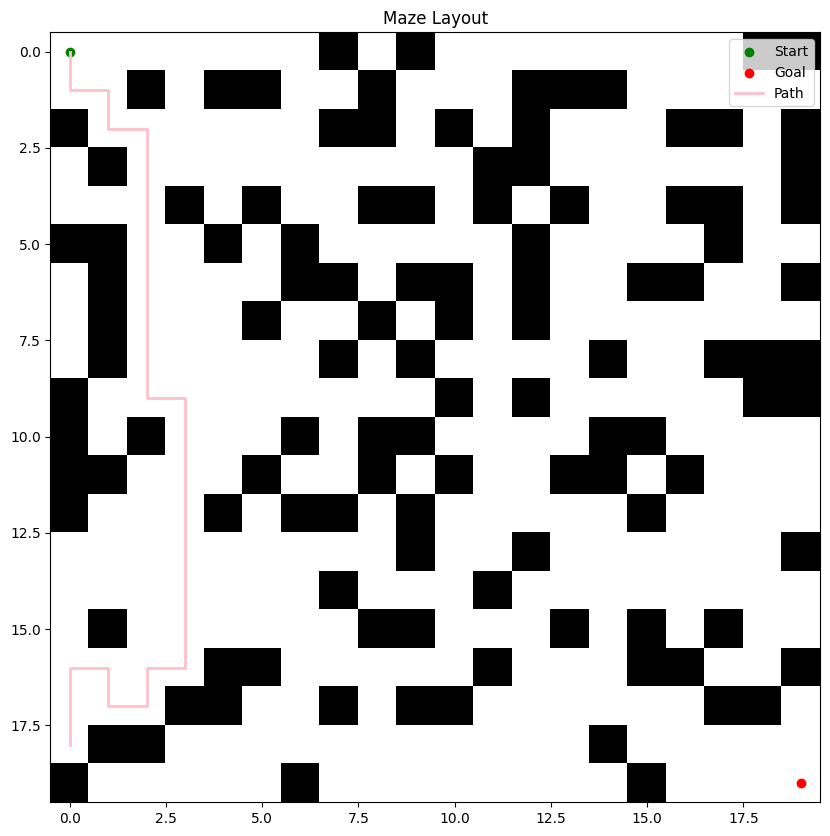

Path found: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (16, 2), (17, 2), (17, 1), (16, 1), (16, 0), (17, 0), (18, 0)]
Number of visited nodes: 26
Execution Time: 0.0003552436828613281 seconds


In [ ]:
# Manhattan Distance function: calculates the distance between two points
def manhattan_distance(pos1, pos2):
    """
    Returns the Manhattan distance between two points, which is the sum of the absolute differences of their coordinates.
    """
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

# Hill Climbing Algorithm
def hill_climbing(maze, start, goal):
    # Get the size of the maze
    grid_size = maze.shape
    # Set the current position to the start position
    current_position = start
    # Initialize the path list to keep track of the positions visited during the climb
    path = [current_position]
    # Initialize the visited set to keep track of positions that have already been visited to avoid revisiting them
    visited = set()
    # Define the maximum steps as the total number of cells in the maze to prevent an infinite loop
    max_steps = grid_size[0] * grid_size[1]

    # While the current position is not the goal and we haven't reached the maximum steps
    while current_position != goal and len(path) < max_steps:
        # List to store valid neighboring positions
        neighbors = []

        # Check the possible neighbors (up, down, left, right)
        for move in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            # Calculate the new position by adding the move to the current position
            new_position = (current_position[0] + move[0], current_position[1] + move[1])
            # Ensure the neighbor is within bounds, not blocked, and not visited
            if (0 <= new_position[0] < grid_size[0] and 0 <= new_position[1] < grid_size[1] and
                maze[new_position[0], new_position[1]] == 0 and new_position not in visited):
                # If the position is valid, add it to the list of neighbors
                neighbors.append(new_position)

        # If there are no valid neighbors, the algorithm is stuck in a local minimum
        if not neighbors:
            print("No valid moves, stuck in local minimum!")
            break

        # Choose the neighbor that brings us closest to the goal (based on Manhattan Distance)
        next_position = min(neighbors, key=lambda x: manhattan_distance(x, goal))

        # If the chosen neighbor is the goal, add it to the path and end the search
        if next_position == goal:
            path.append(next_position)
            break

        # Move to the next chosen position and add it to the path
        current_position = next_position
        path.append(current_position)

        # Mark the current position as visited
        visited.add(current_position)

    # Return the path (list of positions visited) and the visited set (all visited positions)
    return path, visited

# Run the hill climbing algorithm to find the path from start to goal
start_time = time.time()  # Start timer
path, visited = hill_climbing(maze, start_point, goal_point)
end_time = time.time()  # End timer
execution_time = end_time - start_time  # Calculate execution time

# Plot the maze with the path, even if the algorithm is stuck in a local minimum
plot_maze(maze, start_point, goal_point, path)

# Output the path and the number of visited nodes
if path:
    print(f"Path found: {path}")
    print(f"Number of visited nodes: {len(visited)}")
    print(f"Execution Time: {execution_time} seconds")  # Print the execution time
else:
    print("No path found!")



✨Iterative Deepening Search

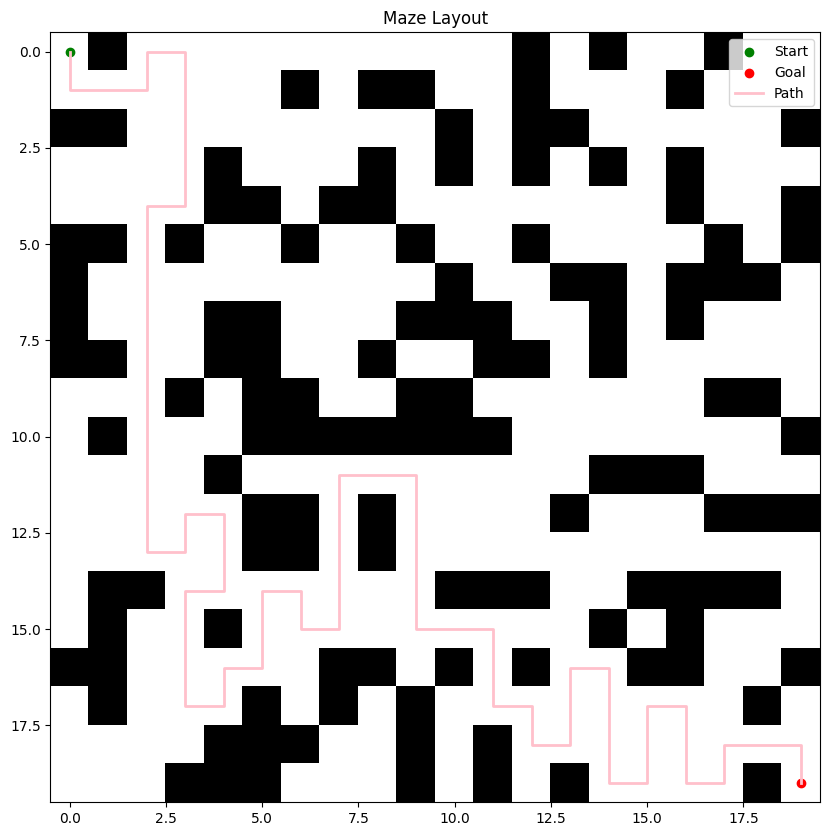

Path found: [(0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (13, 3), (12, 3), (12, 4), (13, 4), (14, 4), (14, 3), (15, 3), (16, 3), (17, 3), (17, 4), (16, 4), (16, 5), (15, 5), (14, 5), (14, 6), (15, 6), (15, 7), (14, 7), (13, 7), (12, 7), (11, 7), (11, 8), (11, 9), (12, 9), (13, 9), (14, 9), (15, 9), (15, 10), (15, 11), (16, 11), (17, 11), (17, 12), (18, 12), (18, 13), (17, 13), (16, 13), (16, 14), (17, 14), (18, 14), (19, 14), (19, 15), (18, 15), (17, 15), (17, 16), (18, 16), (19, 16), (19, 17), (18, 17), (18, 18), (18, 19), (19, 19)]
Number of visited nodes ***: 171
Execution Time: 0.03513813018798828 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to generate a maze of given size with obstacles
def generate_maze(size, obstacle_chance):
    maze = np.zeros(size, dtype=int)  # Initialize the maze with all cells open (value = 0)

    # Add obstacles to the maze
    for i in range(size[0]):  # Loop through rows
        for j in range(size[1]):  # Loop through columns
            if np.random.rand() < obstacle_chance:  # Place an obstacle based on probability
                maze[i, j] = 1  # Set cell value to 1 (obstacle)

    # Ensure the start and goal points are open
    maze[0, 0] = 0  # Start point
    maze[-1, -1] = 0  # Goal point
    return maze

# Function to perform IDDFS and find the shortest path
def iddfs(maze, start, goal):
    def dfs(maze, current, goal, depth, visited):
        # If depth is 0, return None (no path found at this depth)
        if depth == 0:
            return None

        # If we've reached the goal, return the path
        if current == goal:
            return [current]

        # Explore the neighboring positions (up, down, left, right)
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for direction in directions:
            next_pos = (current[0] + direction[0], current[1] + direction[1])

            # Check if the next position is within bounds, not visited, and not an obstacle
            if (0 <= next_pos[0] < maze.shape[0] and
                0 <= next_pos[1] < maze.shape[1] and
                maze[next_pos[0], next_pos[1]] == 0 and
                next_pos not in visited):

                # Mark as visited and explore the next position
                visited.add(next_pos)
                path = dfs(maze, next_pos, goal, depth - 1, visited)
                if path:  # If a path is found, add the current position to the path
                    return [current] + path

        return None

    # Try depths from 1 to the maximum possible depth (number of cells in the maze)
    max_depth = maze.shape[0] * maze.shape[1]
    visited_nodes = set()  # To count visited nodes

    for depth in range(1, max_depth + 1):
        visited = set([start])  # Reset visited set for each depth
        visited_nodes.clear()  # Reset visited nodes count for each depth
        path = dfs(maze, start, goal, depth, visited)

        # Count the visited nodes for this depth
        visited_nodes.update(visited)

        if path:
            return path, len(visited_nodes)  # Return path and number of visited nodes

    return None, len(visited_nodes)  # Return None if no path is found

# Function to display the maze with the path
def plot_maze(maze, start, goal, path=None):
    plt.figure(figsize=(10, 10))  # Set the figure size for better visualization
    plt.imshow(maze, cmap='Greys')  # Display the maze using a grayscale colormap

    # Mark the start point
    plt.scatter(start[1], start[0], c='green', label='Start')

    # Mark the goal point
    plt.scatter(goal[1], goal[0], c='red', label='Goal')

    # If a solution path exists, draw it on the maze
    if path:
        path_x = [p[1] for p in path]  # Extract x-coordinates from the path
        path_y = [p[0] for p in path]  # Extract y-coordinates from the path
        plt.plot(path_x, path_y, color='pink', linewidth=2, label='Path')  # Plot the path

    plt.legend()  # Add a legend to explain markers
    plt.title("Maze Layout")  # Add a title to the plot
    plt.show()  # Display the plot

# Main execution
maze_size = (20, 20)  # Define the size of the maze (20x20 grid)
obstacle_chance = 0.3  # Define the probability of obstacles in the maze
start_point = (0, 0)  # Define the start point
goal_point = (19, 19)  # Define the goal point

# Generate the maze
maze = generate_maze(maze_size, obstacle_chance)

# Run IDDFS to find the path
start_time = time.time()  # Start timer
path, visited_nodes_count = iddfs(maze, start_point, goal_point)
end_time = time.time()  # End timer
execution_time = end_time - start_time  # Calculate execution time

# Plot the maze with the path
plot_maze(maze, start_point, goal_point, path)

# Output the path, number of visited nodes, and execution time
if path:
    print(f"Path found: {path}")
    print(f"Number of visited nodes ***: {visited_nodes_count}")
    print(f"Execution Time: {execution_time} seconds")  # Print the execution time
else:
    print("No path found!")
    print(f"Number of visited nodes: {visited_nodes_count}")